In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from os import walk
import os

The following link has a scrambled image Y of a grayscale image X. Image X has a number. Here are some facts:

1. Image X was scrambled in Python 2.7 using the Mersenne Twister random number generator seeded with the number 2.

2. We used the numpy flatten() function to flatten the 2D image into a 1D array.

3. We used the random.shuffle(...) function (not the numpy one) to shuffle a list of numbers [0, 1, 2, …, n-1] where n is the number of pixels in image X.

4. The shuffled list was used to assign the pixels in the scrambled image like Y[i] = X[shuffled[i]] for all i in [0, 1, 2, …, n-1].

5. Tell us, what's the number in image X? If the unscrambled image is noisy, don't worry about it, as long as you can see the number.

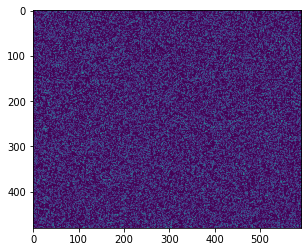

480 592


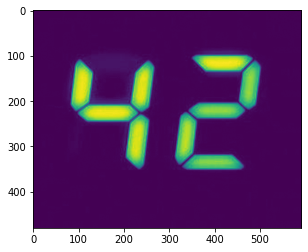

In [16]:
import random

def im_get(imp1):
    image1 = cv2.imread(imp1,0)
    return image1

image1 = im_get("MIT_DATA/mystery_number_scrambled.jpg")
plt.imshow(image1)
plt.show()

scrambled = im_get("MIT_DATA/mystery_number_scrambled.jpg")

m,n = scrambled.shape[:]
print(m,n)
s = scrambled.flatten().copy()
random.seed(2)

saved=[]
for i in reversed(range(1, len(s))):
    # pick an element in x[:i+1] with which to exchange x[i]
    j = int(random.random() * (i+1))
    saved.append(j)
    
for j,i in zip(reversed(saved),range(1,len(s))):
    y = s[j]
    z = s[i]
    s[i]=y
    s[j]=z
    
img = s.reshape((m,n))
plt.imshow(img)
plt.show()
# cv2.imwrite("DATA/unscrambled.jpg",img)